<a href="https://colab.research.google.com/github/Muyassar95/ConstrastesEconomiques_IledeFrance2018/blob/main/Immigration_2018CommunesFrance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. La classification hiérarchique ascendante et le K-Means selon le niveau d'immigration

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
data_communes = pd.read_excel(".../Inegalites2018_IDFCommunes.xlsx")
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,"Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration,Part Ménages 1 personne,Part Ménages Autres sans famille,Part Mén fam princ Couple sans enfant,Part Mén fam princ Couple avec enfant(s),Part Mén fam princ Famille mono
0,75101,11,75,"48,86263049","2,336293447",Paris 1er Arrondissement,38020,0.099,0.031,0.075,...,0.511,0.198,0.153,0.044,0.190,0.569,0.038,0.199,0.127,0.068
1,75102,11,75,"48,86790338","2,344107167",Paris 2e Arrondissement,35710,0.084,0.023,0.064,...,0.538,0.198,0.134,0.050,0.184,0.551,0.040,0.209,0.145,0.055
2,75103,11,75,"48,86305413","2,359361059",Paris 3e Arrondissement,36450,0.085,0.028,0.047,...,0.526,0.220,0.139,0.035,0.201,0.566,0.031,0.207,0.129,0.068
3,75104,11,75,"48,85422828","2,357361938",Paris 4e Arrondissement,34940,0.075,0.030,0.062,...,0.509,0.221,0.156,0.037,0.192,0.551,0.038,0.206,0.133,0.072
4,75105,11,75,"48,84450866","2,349859386",Paris 5e Arrondissement,37480,0.074,0.025,0.053,...,0.574,0.196,0.130,0.035,0.161,0.561,0.032,0.198,0.144,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95676,11,95,"49,08589993","1,730396299",Villers-en-Arthies,27880,0.089,0.077,0.283,...,0.128,0.308,0.359,0.128,0.022,0.250,0.000,0.275,0.375,0.100
1267,95678,11,95,"49,07028882","2,239508719",Villiers-Adam,31760,0.153,0.053,0.218,...,0.329,0.282,0.189,0.141,0.046,0.257,0.000,0.325,0.376,0.042
1268,95680,11,95,"49,00844942","2,40385604",Villiers-le-Bel,13040,0.344,0.068,0.204,...,0.068,0.219,0.384,0.279,0.360,0.272,0.032,0.150,0.375,0.171
1269,95682,11,95,"49,07430887","2,3868896",Villiers-le-Sec,26220,0.113,0.083,0.211,...,0.208,0.250,0.375,0.125,0.122,0.200,0.000,0.333,0.467,0.000


In [ ]:
#Copier le DataSet
communes_socioeco = data_communes.copy()

#Accéder aux colonnes du DataSet
communes_socioeco.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration', 'Part Ménages 1 personne',
       'Part Ménages Autres sans famille',
       'Part Mén fam princ Couple sans enfant',
       'Part Mén fam pr

In [ ]:
#Les librairies pour le clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [ ]:
immigration = communes_socioeco["Taux d'immigration"]
data_immi = pd.DataFrame({"Taux d'immigration":immigration}).set_index(communes_socioeco['Code géographique'])
data_immi

,Taux d'immigration
Code géographique,
75101,0.190
75102,0.184
75103,0.201
75104,0.192
75105,0.161
...,...
95676,0.022
95678,0.046
95680,0.360


In [ ]:
immigration = np.array(immigration)

In [ ]:
immigration.shape[0]
immigration=immigration.reshape(-1,1)
immigration

array([[0.19 ],
       [0.184],
       [0.201],
       ...,
       [0.36 ],
       [0.122],
       [0.036]])

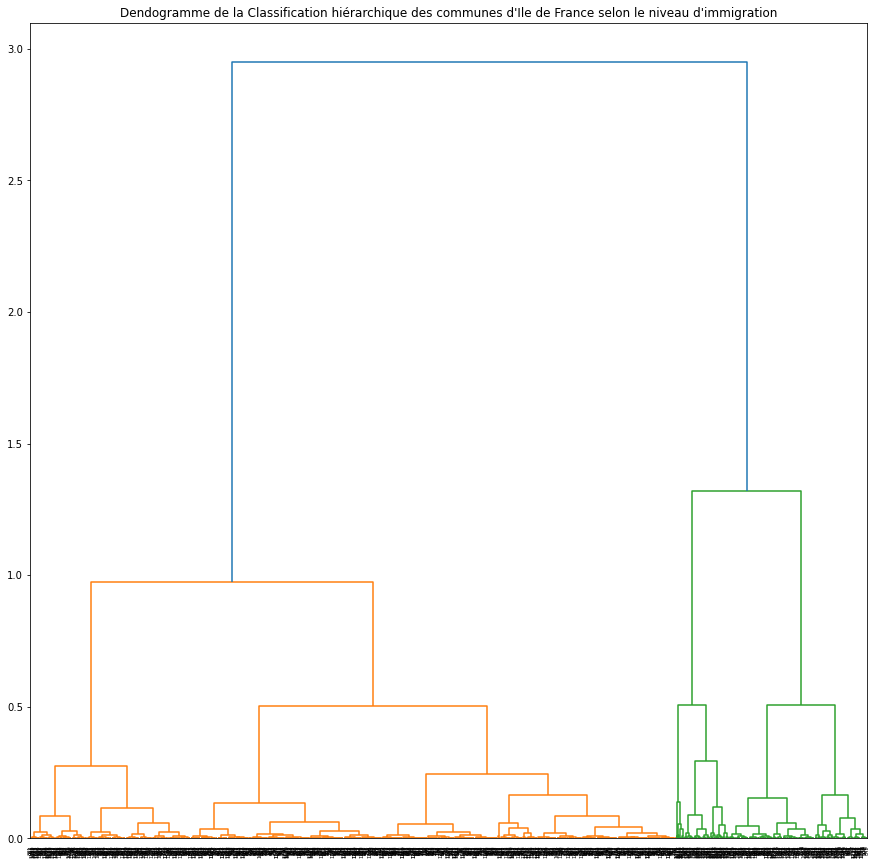

In [ ]:
#Mise en place de la classification hiérarchique ascendante du niveau d'immigration
Z = sch.linkage(immigration,method='ward',metric='euclidean')

#Afficher le dendrogramme
plt.figure(figsize=(15,15))
plt.title("Dendogramme de la Classification hiérarchique des communes d'Ile de France selon le niveau d'immigration")
dendrogram = sch.dendrogram(sch.linkage(immigration, method  = "ward"))
plt.show()

Text(0.5, 1.0, 'K-Means par la méthode du PCA')

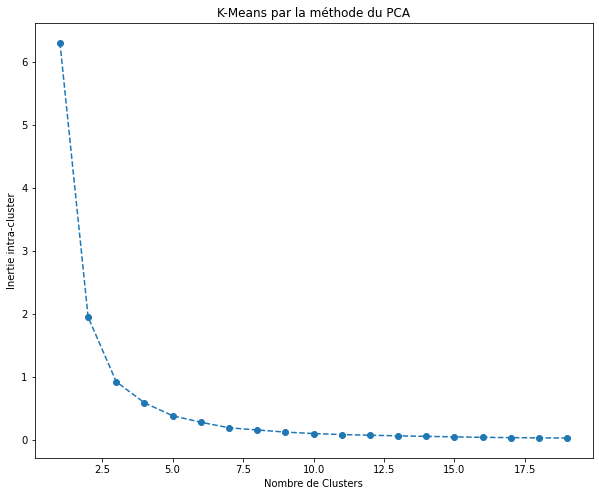

In [ ]:
#Courbe de l'inertie intra-cluster pour le K-Means
inertie_intra = []
for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init='k-means++',random_state=42)
    kmeans_pca.fit(immigration)
    inertie_intra.append(kmeans_pca.inertia_)
    
plt.figure(figsize=(10,8))
plt.plot(range(1,20),inertie_intra, marker='o',linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie intra-cluster')
plt.title('K-Means par la méthode du PCA')

En utilisant la méthode du coude, on peut former seulement 2 clusters par rapport au niveau d'immigration : faible et elevée

In [ ]:
#Nuage des individus avec les 2 strates dans les nouveaux axes de l'ACP
kmeans_pca_immi = KMeans(n_clusters=2,init='k-means++',random_state=42)
kmeans_pca_immi.fit(immigration)

KMeans(n_clusters=2, random_state=42)

In [ ]:
#Créer les nouvelles colonnes dans le DataFrame
data_immi['Numéro de cluster']=kmeans_pca_immi.labels_
data_immi

,Taux d'immigration,Numéro de cluster
Code géographique,,
75101,0.190,0
75102,0.184,0
75103,0.201,0
75104,0.192,0
75105,0.161,0
...,...,...
95676,0.022,1
95678,0.046,1
95680,0.360,0


In [ ]:
#Traduire les numéros de clusters
data_immi["Niveau d'immigration"]=data_immi["Numéro de cluster"].map({0:'Elevée',1:'Faible'})
data_immi

,Taux d'immigration,Numéro de cluster,Niveau d'immigration
Code géographique,,,
75101,0.190,0,Elevée
75102,0.184,0,Elevée
75103,0.201,0,Elevée
75104,0.192,0,Elevée
75105,0.161,0,Elevée
...,...,...,...
95676,0.022,1,Faible
95678,0.046,1,Faible
95680,0.360,0,Elevée


C:\Users\almou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


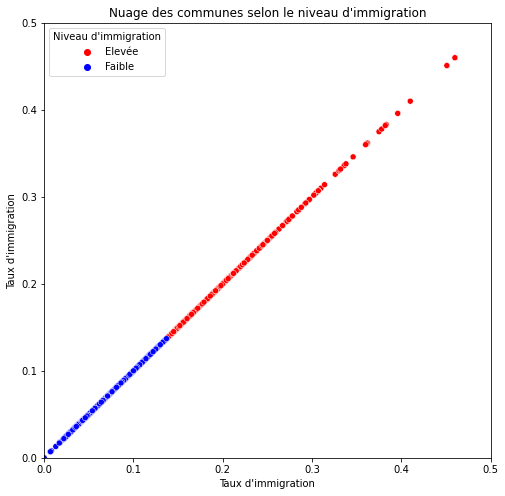

In [ ]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(0,1/2)
axes.set_ylim(0,0.5)
sns.scatterplot(data_immi.iloc[:,0],data_immi.iloc[:,0], hue = data_immi["Niveau d'immigration"], palette = ['r','b'])
plt.title("Nuage des communes selon le niveau d'immigration")
plt.xlabel("Taux d'immigration")
plt.ylabel("Taux d'immigration")
plt.show()

In [ ]:
data_immi.to_excel('.../ImmigrationCommunes2018IDF.xlsx')